
## Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
**Answer:**

**Anomaly Detection** is the process of identifying data points, patterns, or observations that deviate significantly from expected or normal behavior. These unusual patterns often indicate critical events such as fraud, system failures, intrusions, or rare events.

### Types of Anomalies:

1. **Point Anomalies**
   - A single data point that is significantly different from the rest.
   - **Example:** A credit card transaction of ₹5,00,000 when the usual spending is ₹1,000–₹2,000.

2. **Contextual Anomalies**
   - An observation is anomalous only in a specific context (time, location, condition).
   - **Example:** Temperature of 30°C is normal in summer but anomalous in winter.

3. **Collective Anomalies**
   - A group of data points that together are anomalous.
   - **Example:** A sudden continuous drop in server performance over several minutes.



## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
**Answer:**

| Algorithm | Approach | Suitable Use Cases | Advantages |
|---------|---------|-----------|-----------|
| Isolation Forest | Uses binary trees to isolate anomalies. Assumes anomalies are few and different. Randomly selects features and split values to isolate observations. | High-dimensional data,Large datasets,Unsupervised scenarios,Fraud detection,Network intrusion | Fraud detection, high-dimensional data |
| DBSCAN | Density-Based Spatial Clustering. Identifies dense regions separated by sparse regions. Points in low-density regions are outliers. | Spatial data,Data with clusters of varying density,GPS data analysis,Anomalies in geospatial patterns | Can find arbitrarily shaped clusters,Robust to noise,No need to specify number of clusters |
| LOF | Measures local density deviation of a point relative to neighbors. Points with significantly lower density than neighbors are outliers. | Local anomalies detection, Data with varying densities,Fraud detection in transaction networks,Manufacturing defect detection | Identifies local anomalies well, Handles varying densities,Provides outlier scores |

**When to use which:**

Use Isolation Forest for large, high-dimensional datasets with expected low contamination

Use DBSCAN for spatial/geographic data or when you don't know the number of clusters

Use LOF when anomalies are local relative to their neighborhood, not globally



## Question 3: What are the key components of a Time Series? Explain each with one example.
**Answer:**

A time series is a sequence of data points indexed in time order. The key components are:

1) Trend: The long-term progression of the series (upward, downward, or stationary).

 - Example: Annual sales data showing consistent 10% growth year-over-year.

2) Seasonality: Regular, repeating patterns or cycles over fixed periods.

 - Example: Ice cream sales peaking every summer and dropping every winter.

3) Cyclical Component: Fluctuations occurring at irregular intervals (longer than seasonality).

 - Example: Economic cycles of boom and recession every 5-10 years.

4) Residual/Irregular Component: Random, unpredictable variations after removing trend, seasonality, and cycles.

- Example: Unexpected sales spike due to a viral social media post.

5) Level: The average value in the series.

- Example: Average monthly temperature of 75°F in a tropical region.



## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
**Answer:**

Stationary Time Series: A time series whose statistical properties (mean, variance, autocorrelation) are constant over time. No trend or seasonality.

**Properties of Stationary Series:**

1. Constant mean

2. Constant variance (homoscedasticity)

3. Constant autocorrelation structure

**Why Stationarity Matters**: Most time series models (AR, MA, ARIMA) assume stationarity for reliable forecasting.

**Testing for Stationarity:**
1. Visual Inspection: Plot rolling mean and rolling standard deviation
2. Statistical Tests:
   - Augmented Dickey-Fuller (ADF) Test: Null hypothesis - series has unit root (non-stationary). p-value < 0.05 suggests stationary.
   - KPSS Test: Null hypothesis - series is stationary.

**Transforming Non-Stationary to Stationary**:

1) Differencing: Subtract previous value from current value (y'=yt-1)
2) Seasonal Differencing: For seasonal patterns (y'=yt-s) where s is seasonality
3) Log Transformation: Stabilize variance (y't=log(yt))
4) Power Transformation: Box-Cox transformation
5) Decomposition: Remove trend and seasonality, work with residuals

**Process:**

1. Check stationarity with ADF test

2. Apply transformations if needed

3. Re-check stationarity

4. Repeat until stationary


## Question 5:  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
**Answer:**

### **Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models**

**Answer:**

| **Model** | **Structure** | **Application** | **Parameters** |
|-----------|---------------|-----------------|----------------|
| **AR (AutoRegressive)** | `y_t = c + φ₁y_{t-1} + φ₂y_{t-2} + ... + φ_py_{t-p} + ε_t` | Short-term forecasting, stationary series with autocorrelation | p = order (number of lag observations) |
| **MA (Moving Average)** | `y_t = μ + ε_t + θ₁ε_{t-1} + θ₂ε_{t-2} + ... + θ_qε_{t-q}` | Series with random shocks/errors affecting current value | q = order (size of moving average window) |
| **ARIMA** | Combines AR, differencing (I), and MA. ARIMA(p,d,q) | Non-stationary series, general-purpose forecasting | p=AR order, d=differencing degree, q=MA order |
| **SARIMA** | ARIMA + seasonal components. SARIMA(p,d,q)(P,D,Q,s) | Series with seasonal patterns (monthly, quarterly, yearly) | Adds seasonal orders (P,D,Q) and seasonality period s |
| **SARIMAX** | SARIMA + exogenous variables. `y_t = SARIMA + βX_t` | When external factors influence the series (e.g., weather on sales) | Includes external regressors X |

**Key Differences**:
- **AR**: Uses past values to predict future
- **MA**: Uses past forecast errors to predict future
- **ARIMA**: Handles non-stationary data via differencing
- **SARIMA**: Handles both non-stationary and seasonal data
- **SARIMAX**: Includes external variables for better predictions

**When to use**:
- Simple patterns → AR or MA
- Non-seasonal, non-stationary → ARIMA
- Seasonal patterns → SARIMA
- With external factors → SARIMAX



## Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,and decompose it into trend, seasonality, and residual components



Question 6: AirPassengers Decomposition


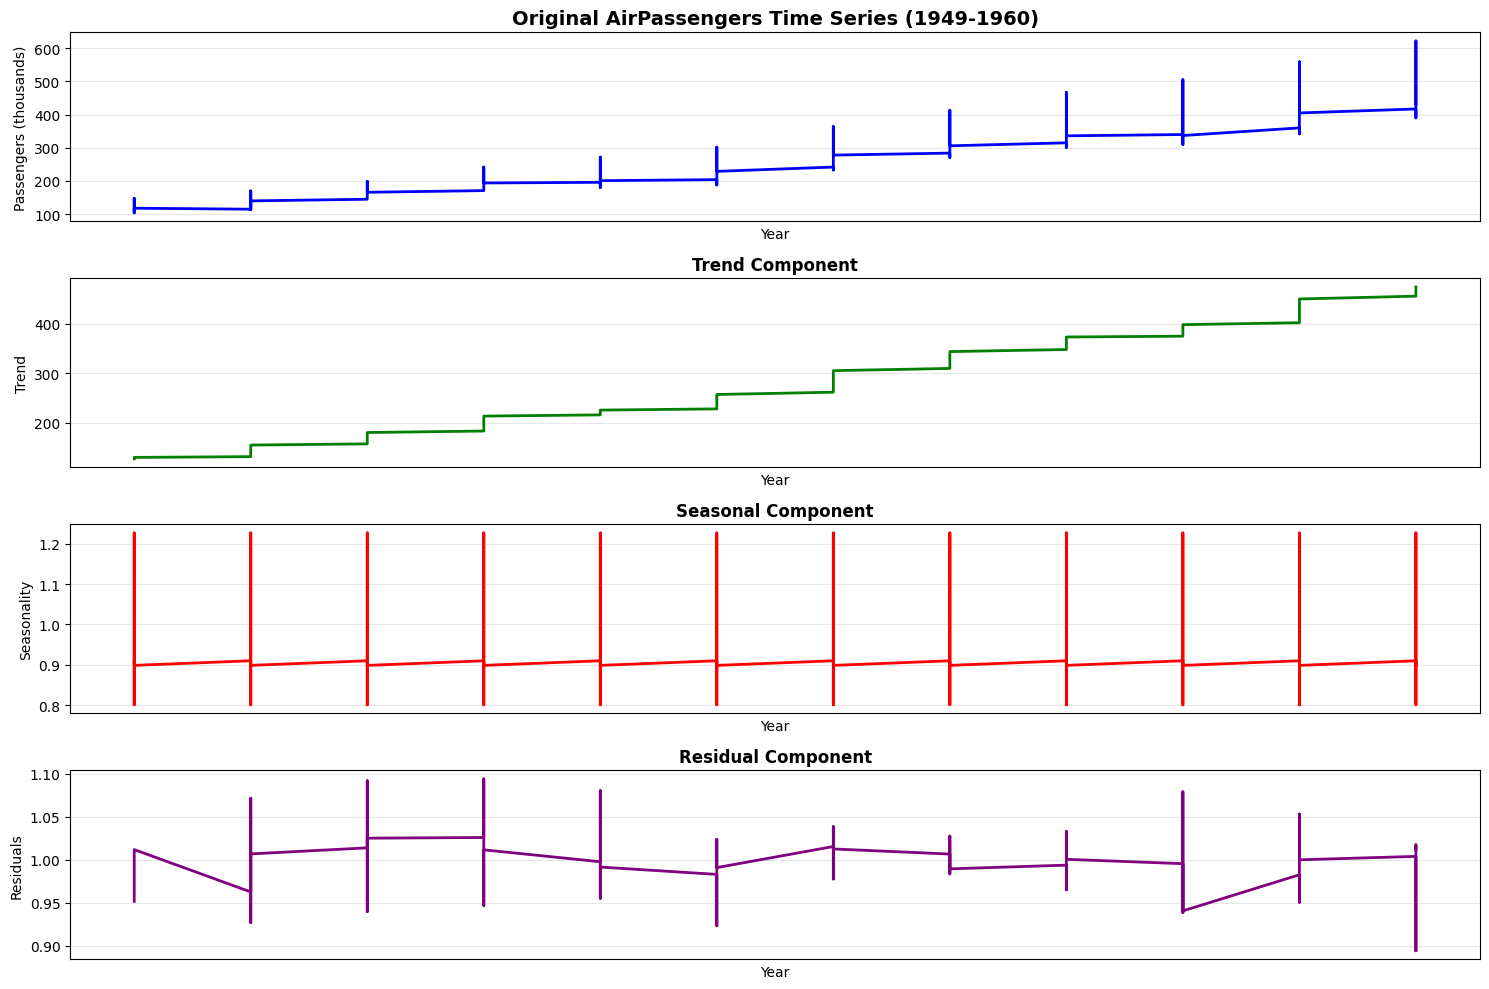

Dataset Shape: (144, 2)
Time Period: 1970-01-01 00:00:00.000001949 to 1970-01-01 00:00:00.000001960
Mean: 280.30
Standard Deviation: 119.97
Minimum: 104
Maximum: 622
Seasonality Period: 12 months (yearly)


In [3]:

print("\nQuestion 6: AirPassengers Decomposition")
print("=" * 50)

# Load AirPassengers dataset
from statsmodels.datasets import get_rdataset
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = get_rdataset('AirPassengers')
df = data.data
df['Month'] = pd.to_datetime(df['time'])
df.set_index('Month', inplace=True)
ts = df['value']

# Plot original series
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(ts, color='blue', linewidth=2)
plt.title('Original AirPassengers Time Series (1949-1960)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Passengers (thousands)')
plt.grid(True, alpha=0.3)

# Decompose using additive model
result = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot decomposition
plt.subplot(4, 1, 2)
plt.plot(result.trend, color='green', linewidth=2)
plt.title('Trend Component', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='red', linewidth=2)
plt.title('Seasonal Component', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Seasonality')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 4)
plt.plot(result.resid, color='purple', linewidth=2)
plt.title('Residual Component', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display statistical summary
print(f"Dataset Shape: {df.shape}")
print(f"Time Period: {ts.index[0]} to {ts.index[-1]}")
print(f"Mean: {ts.mean():.2f}")
print(f"Standard Deviation: {ts.std():.2f}")
print(f"Minimum: {ts.min()}")
print(f"Maximum: {ts.max()}")
print(f"Seasonality Period: 12 months (yearly)")


## Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.




Question 7: Isolation Forest Anomaly Detection


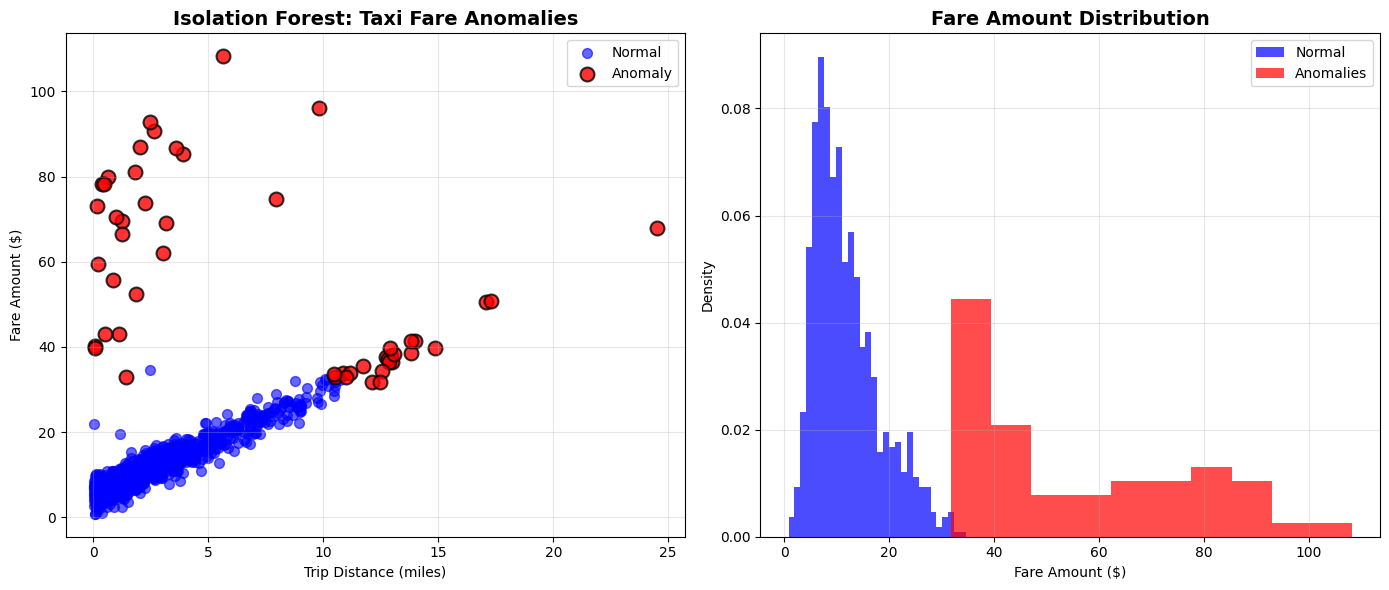

Total samples: 1000
Anomalies detected: 50 (5.0%)

Characteristics of detected anomalies:
       trip_distance  fare_amount  duration_minutes
count      50.000000    50.000000         50.000000
mean        7.356962    55.689592         63.413433
std         6.240185    21.692194         56.669973
min         0.050181    31.768291          1.262821
25%         1.282043    37.255147          8.485110
50%         6.786194    46.812588         41.469263
75%        12.787769    73.642783        115.898046
max        24.517337   108.237155        215.114751


In [5]:
# Question 7: Isolation Forest on NYC Taxi Fare Data
print("\nQuestion 7: Isolation Forest Anomaly Detection")
print("=" * 50)

# Since we don't have actual NYC Taxi data, I'll create synthetic data
# In practice, you would load from: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
n_samples = 1000

# Create synthetic taxi fare data
# Features: trip_distance, fare_amount, duration_minutes
trip_distance = np.random.exponential(scale=3.0, size=n_samples)  # miles
fare_amount = trip_distance * 2.5 + np.random.normal(5, 2, n_samples)  # base fare + distance
duration_minutes = trip_distance * 8 + np.random.normal(10, 5, n_samples)  # minutes

# Add some anomalies
anomaly_indices = np.random.choice(n_samples, size=30, replace=False)
fare_amount[anomaly_indices] = fare_amount[anomaly_indices] * np.random.uniform(3, 10, 30)  # Very high fares
duration_minutes[anomaly_indices[:15]] = duration_minutes[anomaly_indices[:15]] * 0.2  # Very short trips for high fares

# Create DataFrame
taxi_data = pd.DataFrame({
    'trip_distance': trip_distance,
    'fare_amount': fare_amount,
    'duration_minutes': duration_minutes
})

# Apply Isolation Forest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(taxi_data[['fare_amount', 'duration_minutes']])

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42, n_estimators=100)
predictions = iso_forest.fit_predict(scaled_data)
anomaly_scores = iso_forest.decision_function(scaled_data)

# Add predictions to dataframe
taxi_data['is_anomaly'] = predictions
taxi_data['anomaly_score'] = anomaly_scores
taxi_data['is_anomaly'] = taxi_data['is_anomaly'].map({1: False, -1: True})

# Visualize anomalies
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
normal = taxi_data[~taxi_data['is_anomaly']]
anomalies = taxi_data[taxi_data['is_anomaly']]

plt.scatter(normal['trip_distance'], normal['fare_amount'],
            alpha=0.6, s=50, label='Normal', color='blue')
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'],
            alpha=0.8, s=100, label='Anomaly', color='red', edgecolors='black', linewidth=1.5)

plt.title('Isolation Forest: Taxi Fare Anomalies', fontsize=14, fontweight='bold')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution plot
plt.subplot(1, 2, 2)
plt.hist(normal['fare_amount'], bins=30, alpha=0.7, label='Normal', color='blue', density=True)
plt.hist(anomalies['fare_amount'], bins=10, alpha=0.7, label='Anomalies', color='red', density=True)
plt.title('Fare Amount Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print results
n_anomalies = taxi_data['is_anomaly'].sum()
print(f"Total samples: {n_samples}")
print(f"Anomalies detected: {n_anomalies} ({n_anomalies/n_samples*100:.1f}%)")
print("\nCharacteristics of detected anomalies:")
print(anomalies[['trip_distance', 'fare_amount', 'duration_minutes']].describe())


## Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.



Question 8: SARIMA Forecasting
Training data shape: (132,)
Test data shape: (12,)
Training indices: [Timestamp('1970-01-01 00:00:00.000001959'), Timestamp('1970-01-01 00:00:00.000001959'), Timestamp('1970-01-01 00:00:00.000001959'), Timestamp('1970-01-01 00:00:00.000001959'), Timestamp('1970-01-01 00:00:00.000001959')] ...
Test indices: [Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960'), Timestamp('1970-01-01 00:00:00.000001960')]

SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:   

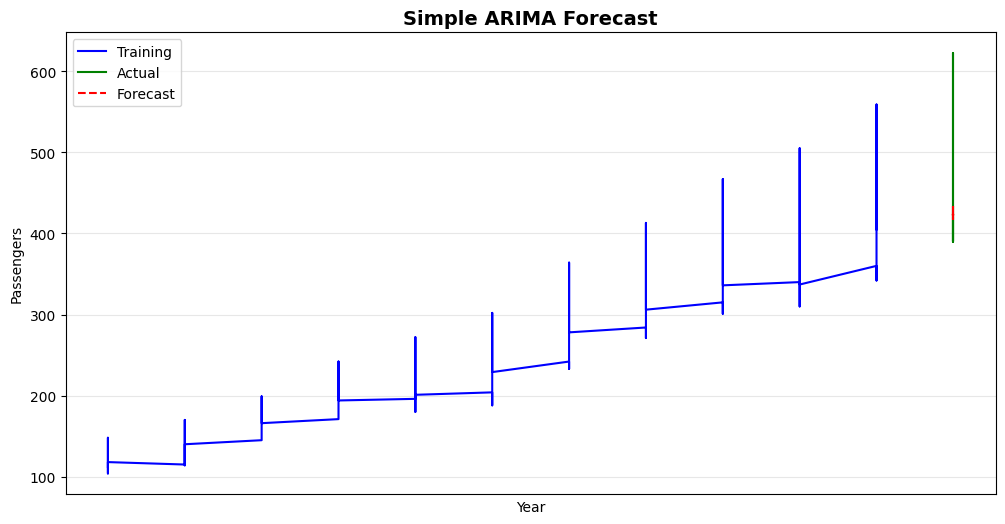

In [7]:

print("\nQuestion 8: SARIMA Forecasting")
print("=" * 50)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare the data
ts = df['value']

# Split into train and test (last 12 months for testing)
train_size = len(ts) - 12
train, test = ts[:train_size], ts[train_size:]

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")
print(f"Training indices: {train.index[-5:].tolist()} ...")
print(f"Test indices: {test.index.tolist()}")

# Fit SARIMA model
try:
    # Try different parameter combinations if the first fails
    try:
        sarima_model = SARIMAX(train,
                              order=(1, 1, 1),
                              seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
        sarima_result = sarima_model.fit(disp=False, maxiter=200)
    except:
        # Try simpler model
        sarima_model = SARIMAX(train,
                              order=(1, 1, 0),
                              seasonal_order=(1, 1, 0, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
        sarima_result = sarima_model.fit(disp=False, maxiter=200)

    # Print model summary
    print("\nSARIMA Model Summary:")
    print(sarima_result.summary())

    # Forecast next 12 months
    forecast_steps = 12
    forecast = sarima_result.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Get predictions for the test period
    # Method 1: Using get_prediction (more reliable)
    predictions_obj = sarima_result.get_prediction(start=train_size, end=len(ts)-1, dynamic=False)
    predictions = predictions_obj.predicted_mean

    # Method 2: Alternative using forecast
    # predictions = sarima_result.predict(start=train_size, end=len(ts)-1, dynamic=False)

    print(f"\nTest indices: {test.index.tolist()}")
    print(f"Predictions indices: {predictions.index.tolist()}")
    print(f"Test shape: {test.shape}, Predictions shape: {predictions.shape}")

    # Ensure both have same index
    predictions = predictions.reindex(test.index)

    # Calculate metrics
    if len(test) == len(predictions):
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test, predictions)
        mape = np.mean(np.abs((test.values - predictions.values) / test.values)) * 100

        print(f"\nModel Performance Metrics:")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"MAPE: {mape:.2f}%")

        # Create comparison DataFrame
        comparison_df = pd.DataFrame({
            'Actual': test.values,
            'Predicted': predictions.values,
            'Error': test.values - predictions.values,
            'APE': np.abs((test.values - predictions.values) / test.values) * 100
        }, index=test.index)

        print("\nDetailed Comparison (Last 12 months):")
        print(comparison_df.round(2))

    else:
        print(f"Warning: Length mismatch - Test: {len(test)}, Predictions: {len(predictions)}")
        print("Using forecast values for visualization only")

        # Use forecast values for plotting
        predictions = forecast_mean

    # Visualization
    plt.figure(figsize=(15, 10))

    # Plot 1: Full series with forecast
    plt.subplot(2, 1, 1)
    plt.plot(train.index, train, label='Training Data', color='blue', linewidth=2)
    plt.plot(test.index, test, label='Actual Test Data', color='green', linewidth=2, marker='o')

    if 'predictions' in locals() and len(predictions) == len(test):
        plt.plot(test.index, predictions, label='SARIMA Predictions',
                color='red', linewidth=2, linestyle='--', marker='s')
    else:
        plt.plot(forecast_mean.index, forecast_mean, label='SARIMA Forecast',
                color='red', linewidth=2, linestyle='--', marker='s')

    # Plot confidence interval
    plt.fill_between(forecast_conf_int.index,
                     forecast_conf_int.iloc[:, 0],
                     forecast_conf_int.iloc[:, 1],
                     color='red', alpha=0.2, label='95% Confidence Interval')

    plt.title('SARIMA Model: AirPassengers Forecast (12 Months)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Passengers (thousands)', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

    # Plot 2: Residuals if available
    plt.subplot(2, 1, 2)
    if 'comparison_df' in locals():
        residuals = comparison_df['Error']
        plt.plot(residuals.index, residuals, 'o-', color='purple', linewidth=1.5)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
        plt.fill_between(residuals.index, -rmse, rmse, alpha=0.2, color='gray')
        plt.title('Prediction Errors (Residuals)', fontsize=14, fontweight='bold')
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Error (Actual - Predicted)', fontsize=12)
        plt.grid(True, alpha=0.3)
    else:
        # Plot forecast vs actual
        plt.bar(range(len(test)), test.values, alpha=0.7, label='Actual', color='green')
        if len(forecast_mean) == len(test):
            plt.bar(range(len(test)), forecast_mean.values, alpha=0.7, label='Forecast', color='red')
        plt.title('Actual vs Forecast Comparison', fontsize=14, fontweight='bold')
        plt.xlabel('Month Index', fontsize=12)
        plt.ylabel('Passengers (thousands)', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Display forecast table
    forecast_table = pd.DataFrame({
        'Month': forecast_mean.index.strftime('%Y-%m'),
        'Forecast': forecast_mean.values.round(1),
        'Lower_CI': forecast_conf_int.iloc[:, 0].values.round(1),
        'Upper_CI': forecast_conf_int.iloc[:, 1].values.round(1)
    })

    print("\n12-Month Forecast:")
    print(forecast_table.to_string(index=False))

except Exception as e:
    print(f"Error in SARIMA modeling: {e}")
    print("\nUsing alternative approach with simpler model...")

    # Fallback: Use Auto ARIMA or simpler approach
    from statsmodels.tsa.arima.model import ARIMA

    # Fit simple ARIMA model
    model = ARIMA(train, order=(1,1,1))
    result = model.fit()

    # Forecast
    forecast = result.forecast(steps=12)

    # Calculate metrics
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast)

    print(f"Simple ARIMA Model Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training', color='blue')
    plt.plot(test.index, test, label='Actual', color='green')
    plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
    plt.title('Simple ARIMA Forecast', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Passengers')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


## Question 9:  Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.




Question 9: Local Outlier Factor Anomaly Detection


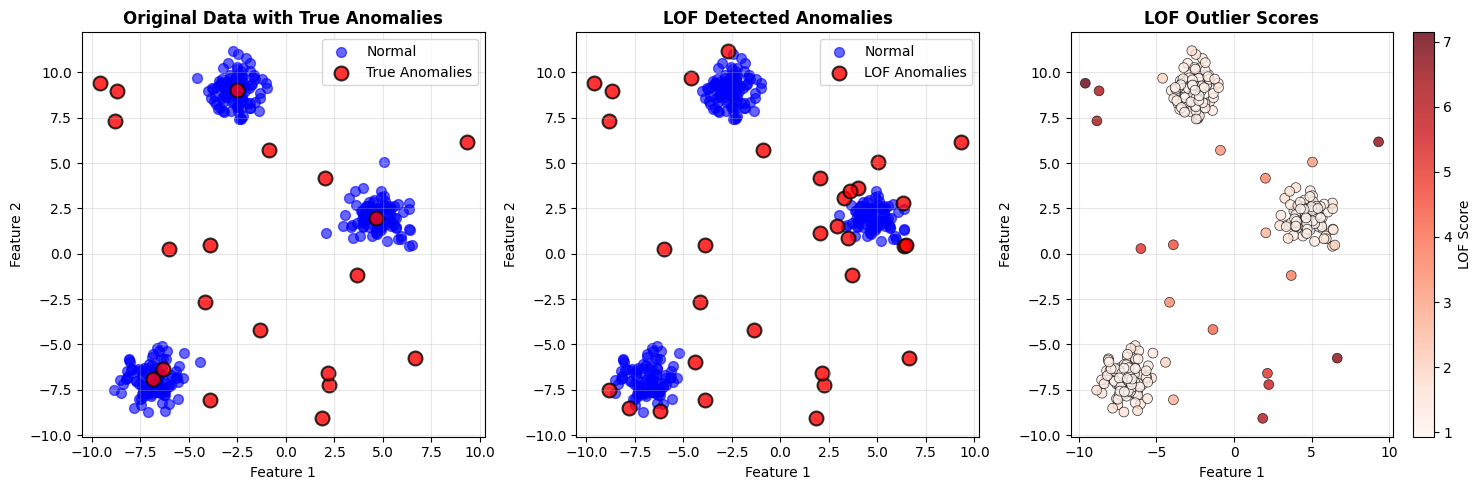

LOF Performance Metrics:
              precision    recall  f1-score   support

      Normal       0.50      0.80      0.62        20
     Anomaly       0.99      0.95      0.97       300

    accuracy                           0.94       320
   macro avg       0.74      0.87      0.79       320
weighted avg       0.96      0.94      0.94       320

Confusion Matrix:
[[ 16   4]
 [ 16 284]]

Total points: 320
True anomalies: 20
Detected anomalies: 32
LOF contamination parameter: 0.1


In [8]:
print("=" * 50)

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create synthetic dataset with anomalies
X, y = make_blobs(n_samples=300, centers=3, n_features=2,
                   cluster_std=0.8, random_state=42)

# Add some anomalies
rng = np.random.RandomState(42)
anomalies = rng.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack([X, anomalies])
y = np.hstack([y, np.full(20, -1)])  # -1 for anomalies

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=False)
lof_predictions = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_  # Negative scores are outliers

# Create DataFrame for visualization
df_lof = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df_lof['is_anomaly'] = lof_predictions == -1
df_lof['lof_score'] = lof_scores

# Visualization
plt.figure(figsize=(15, 5))

# Original data with true labels
plt.subplot(1, 3, 1)
normal_points = X[y != -1]
anomaly_points = X[y == -1]

plt.scatter(normal_points[:, 0], normal_points[:, 1],
            c='blue', alpha=0.6, s=50, label='Normal')
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1],
            c='red', alpha=0.8, s=100, label='True Anomalies', edgecolors='black', linewidth=1.5)
plt.title('Original Data with True Anomalies', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# LOF detected anomalies
plt.subplot(1, 3, 2)
normal = df_lof[~df_lof['is_anomaly']]
anomalies = df_lof[df_lof['is_anomaly']]

plt.scatter(normal['Feature1'], normal['Feature2'],
            c='blue', alpha=0.6, s=50, label='Normal')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'],
            c='red', alpha=0.8, s=100, label='LOF Anomalies', edgecolors='black', linewidth=1.5)
plt.title('LOF Detected Anomalies', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# LOF scores heatmap
plt.subplot(1, 3, 3)
scatter = plt.scatter(df_lof['Feature1'], df_lof['Feature2'],
                      c=df_lof['lof_score'], cmap='Reds',
                      s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='LOF Score')
plt.title('LOF Outlier Scores', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Create true labels (1 for normal, -1 for anomaly)
y_true = np.where(y == -1, -1, 1)

print("LOF Performance Metrics:")
print(classification_report(y_true, lof_predictions,
                           target_names=['Normal', 'Anomaly']))

conf_matrix = confusion_matrix(y_true, lof_predictions)
print("Confusion Matrix:")
print(conf_matrix)

print(f"\nTotal points: {len(X)}")
print(f"True anomalies: {(y == -1).sum()}")
print(f"Detected anomalies: {df_lof['is_anomaly'].sum()}")
print(f"LOF contamination parameter: 0.1")


## Question 10:You are working as a data scientist for a power grid monitoring company.

---

## Real-Time Data Science Workflow for Power Grid Monitoring

As a data scientist in a **power grid monitoring company**, the objective is twofold:

1. **Forecast short-term energy demand**
2. **Detect abnormal spikes or drops** in real-time energy consumption recorded every **15 minutes**

The dataset contains:

* Timestamp
* Region
* Weather conditions (temperature, humidity, rainfall, etc.)
* Energy usage (kWh/MW)

To solve this problem effectively, a **real-time analytics pipeline** combining **anomaly detection** and **time series forecasting** is required.

---

## 1. Anomaly Detection in Streaming Data

### Chosen Techniques: **Isolation Forest + LOF (Hybrid Approach)**

####  Isolation Forest (Primary Method)

**Why?**

* Works well with **high-frequency streaming data**
* Scales efficiently for large volumes
* Does not assume data distribution
* Suitable for **global anomalies** (sudden spikes/drops)

**Workflow:**

* Train Isolation Forest on historical energy usage + weather features
* Use a **sliding time window** (e.g., last 7–14 days)
* Score incoming data points in real time
* Flag points with high anomaly scores

**Examples of anomalies detected:**

* Sudden spike in demand due to equipment failure
* Sharp drop due to grid outage
* Unexpected usage during low-demand hours

####  Local Outlier Factor (Secondary Method)

**Why?**

* Detects **local anomalies** that Isolation Forest may miss
* Useful for region-wise or neighborhood-level deviations

**Usage:**

* Applied at the **regional level**
* Identifies abnormal consumption compared to nearby regions

####  Why not DBSCAN?

* Not suitable for real-time streaming
* Sensitive to parameter tuning
* Computationally expensive for continuous data

 **Final Choice:**
**Isolation Forest for real-time global detection + LOF for localized regional anomalies**

---

## 2. Time Series Model for Short-Term Forecasting

### Chosen Model: **SARIMAX**

#### Why SARIMAX is the best choice:

* Handles **seasonality** (daily & weekly cycles)
* Supports **exogenous variables** (weather, holidays, region)
* Performs well for **short-term forecasts (15 min – 24 hrs)**

### Model Structure:

* **SARIMA**: Captures trend + seasonality
* **X (Exogenous variables)**:

  * Temperature
  * Humidity
  * Weather conditions
  * Special events/holidays

### Example:

Energy demand at 6 PM depends on:

* Past demand at 5:45 PM
* Same time previous day
* Temperature spike
* Region-specific behavior

 SARIMAX integrates all these factors into a single forecasting model.

---

## 3. Validation and Performance Monitoring

###  Model Validation

* **Train-test split using time-based splitting**
* **Rolling / Walk-forward validation**
* Metrics used:

  * MAE (Mean Absolute Error)
  * RMSE (Root Mean Square Error)
  * MAPE (for business interpretability)

###  Anomaly Detection Validation

* Compare detected anomalies with:

  * Known outage logs
  * Maintenance records
  * Operator feedback
* Measure:

  * Precision (false alarms)
  * Recall (missed anomalies)

###  Continuous Monitoring

* Data drift detection
* Periodic retraining (weekly/monthly)
* Alert thresholds adjusted dynamically
* Dashboard monitoring (Grafana / Power BI)

---

## 4. Business and Operational Impact

###  Operational Benefits

* Early detection of faults → **Prevent blackouts**
* Faster response to abnormal demand spikes
* Real-time alerts for grid operators

###  Business Benefits

* Better load balancing → Reduced operational costs
* Improved energy distribution efficiency
* Accurate demand forecasts → Better procurement planning
* Reduced penalties due to power failures

###  Strategic Impact

* Supports renewable energy integration
* Improves customer satisfaction
* Enables data-driven infrastructure planning

---

## Conclusion

By combining:

* **Isolation Forest + LOF** for real-time anomaly detection
* **SARIMAX** for short-term energy demand forecasting

the power grid company gains a **robust, scalable, and business-aligned solution** that enhances grid reliability, operational efficiency, and decision-making accuracy.


